In [79]:
# Data wrangling:
import numpy as np
import pandas as pd

# Data Visualization:
import seaborn as sns
from yellowbrick.regressor import (
    residuals_plot,
    prediction_error
)

# Pipelines:
from sklearn.pipeline import (
    Pipeline,
    make_pipeline
)
from sklearn.compose import (
    make_column_selector as selector,
    ColumnTransformer,
)

# Seleção e validação dos modelos:
from sklearn import metrics
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

# Pre-processing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
)

# Modelos:
from sklearn.dummy import DummyClassifier
from sklearn.tree import (
    DecisionTreeClassifier,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# Deployment:
import pickle

# Config:
from sklearn import set_config
set_config(transform_output='pandas')

from DataUnderstanding import DataUnderstanding

# Telco Customer Churn:

## DataFrame:

In [41]:
path = r'../data/customer_churn.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=','
)

In [42]:
display(df.head(3))

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1


## Código:

In [43]:
class TelcoCustomerChurn(DataUnderstanding):
    def get_metrics(self, y_true, y_pred):
        dict_metrics = {
            'Accuracy': metrics.accuracy_score(y_true, y_pred),
            'Balanced Accuracy': metrics.balanced_accuracy_score(y_true, y_pred),
            'Recall': metrics.recall_score(y_true, y_pred),
            'Precison': metrics.precision_score(y_true, y_pred),
            'F1': metrics.f1_score(y_true, y_pred),
            'ROC_AUC': metrics.roc_auc_score(y_true, y_pred)
        }
        return dict_metrics
if __name__ == "__main__":
    telco_customer_churn = TelcoCustomerChurn()

## Output:

### Data Understanding:

In [44]:
display(df.head(3))

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1


In [45]:
display(df.tail(3))

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
7029,2234-XADUH,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,5560,0
7030,4801-JZAZL,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,2793,0
7031,3186-AJIEK,34.424926,-117.184503,Male,No,No,No,66,Yes,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,5097,0


In [46]:
df.columns

Index(['CustomerID', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Value'],
      dtype='object')

In [47]:
telco_customer_churn.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 7032 
Colunas: 24


In [48]:
telco_customer_churn.descrição(
    dataframe=df,
    vertical=True
)

,count,mean,std,min,10%,15%,25%,50%,75%,85%,95%,99%,max
Latitude,7032.0,36.28,2.46,32.56,33.66,33.82,34.03,36.39,38.23,38.93,40.56,41.58,41.96
Longitude,7032.0,-119.80,2.16,-124.30,-122.48,-122.26,-121.82,-119.74,-118.04,-117.39,-116.76,-115.52,-114.19
Tenure Months,7032.0,32.42,24.55,1.00,2.00,4.00,9.00,29.00,55.00,65.00,72.00,72.00,72.00
Monthly Charges,7032.0,64.80,30.09,18.25,20.05,20.60,35.59,70.35,89.86,98.60,107.42,114.73,118.75
Total Charges,7032.0,2283.30,2266.77,18.80,84.60,164.56,401.45,1397.48,3794.74,5200.15,6923.59,8039.88,8684.80
CLTV,7032.0,4401.45,1182.41,2003.00,2613.00,2898.00,3469.75,4527.50,5381.00,5692.00,6087.00,6424.69,6500.00
Churn Value,7032.0,0.27,0.44,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00


In [49]:
telco_customer_churn.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
CustomerID,0,0.00%
Latitude,0,0.00%
Longitude,0,0.00%
Gender,0,0.00%
Senior Citizen,0,0.00%
Partner,0,0.00%
Dependents,0,0.00%
Tenure Months,0,0.00%
Phone Service,0,0.00%
Multiple Lines,0,0.00%


In [50]:
telco_customer_churn.verificando_valores_duplicados(
    dataframe=df
)

,Quantidade,Porcentagem
CustomerID,0,0.00%
Latitude,5380,76.51%
Longitude,5381,76.52%
Gender,7030,99.97%
Senior Citizen,7030,99.97%
Partner,7030,99.97%
Dependents,7030,99.97%
Tenure Months,6960,98.98%
Phone Service,7030,99.97%
Multiple Lines,7029,99.96%


In [51]:
telco_customer_churn.verificando_tipos(
    dataframe=df
)

,Tipos
CustomerID,object
Latitude,float64
Longitude,float64
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object


#### Checking Distribution:

In [52]:
df['Churn Value'].eq(0).sum() / df.shape[0]

0.7342150170648464

In [53]:
# Separando as colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Separando as colunas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Colunas Categóricas:")
print(categorical_columns)

print("\nColunas Numéricas:")
print(numeric_columns)

Colunas Categóricas:
Index(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

Colunas Numéricas:
Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Churn Value'],
      dtype='object')


### Data Preparation:

In [54]:
NUMERICAL_FEATURES = [
    'Latitude',
    'Longitude',
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'CLTV'
]

CATEGORICAL_FEATURES = [
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method'
]

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'Churn Value'

#### Seed:

In [55]:
seed = 69

#### Separando x e y:

In [56]:
x = df[FEATURES]
y = df[TARGET]

#### Train-test Split:

In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=seed,
)

#### Pre-processing:

##### Null Handling:

In [58]:
numeric_processor = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(), 
)

categorical_processor  = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), 
)

#### Pre-processing Pipeline:

In [59]:
pre_processing = ColumnTransformer([
    (
        'one',
        categorical_processor,
        CATEGORICAL_FEATURES,
    ),
    (
        'scaler',
        numeric_processor,
        NUMERICAL_FEATURES,
    ),
])

#### Test Pre-processing:

In [60]:
df_test = x
result = pre_processing.fit_transform(df_test)

result.shape

(7032, 43)

### Modeling:

#### Pipeline:

In [61]:
pipeline = Pipeline([
    ('pre_processing', pre_processing),
    ('model', DummyClassifier()),
])

#### GridSearchCV:

##### Models:

In [62]:
params = {
    'model' : [
        DummyClassifier(),
        DecisionTreeClassifier(random_state=seed, class_weight='balanced'),
        RandomForestClassifier(random_state=seed, class_weight='balanced'),
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
    ]
}

##### Buscando os melhores modelos:

In [63]:
grid_model = GridSearchCV(
    pipeline,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1
)
grid_model.fit(
    x_train, 
    y_train
)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('one',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Senior '
                                                                          'Citizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'Phone '
                                                                          'Service',
                                                                          'Multiple '
                                                                          '...
                                                                          'Monthly '
                                                                          'Charges',
                                                                          'Total '
                                                                          'Charges',
                                                                          'CLTV'])])),
                                       ('model', DummyClassifier())]),
             param_grid={'model': [DummyClassifier(),
                                   DecisionTreeClassifier(class_weight='balanced',
                                                          random_state=69),
                                   RandomForestClassifier(class_weight='balanced',
                                                          random_state=69),
                                   AdaBoostClassifier(random_state=69),
                                   GradientBoostingClassifier(random_state=69)]},
             scoring='r2', verbose=1)

##### GridSearchCV resultados:

In [64]:
df_grid_cv_result = (
    pd.DataFrame(grid_model.cv_results_)
    .set_index('rank_test_score')
    .sort_index()
)
display(df_grid_cv_result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,
1,1.133125,0.003721,0.018863,0.002820,GradientBoostingClassifier(random_state=69),{'model': GradientBoostingClassifier(random_st...,0.035595,-0.086791,0.064968,-0.035434,0.030372,0.001742,0.055106
2,0.362633,0.002538,0.030737,0.000883,AdaBoostClassifier(random_state=69),{'model': AdaBoostClassifier(random_state=69)},0.020909,-0.081896,0.025804,-0.040318,-0.013702,-0.017840,0.040080
3,0.666769,0.029470,0.037809,0.001094,RandomForestClassifier(class_weight='balanced'...,{'model': RandomForestClassifier(class_weight=...,0.006223,-0.062314,-0.042732,-0.079391,-0.013702,-0.038383,0.031216
4,0.097143,0.002121,0.019614,0.000794,DecisionTreeClassifier(class_weight='balanced'...,{'model': DecisionTreeClassifier(class_weight=...,-0.292400,-0.194491,-0.336459,-0.426164,-0.243866,-0.298676,0.079472
5,0.069225,0.005834,0.024994,0.003761,DummyClassifier(),{'model': DummyClassifier()},-0.356041,-0.356041,-0.356041,-0.357786,-0.356499,-0.356482,0.000676


##### The best model:

In [65]:
grid_model.best_estimator_

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('one',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Se...
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method']),
                                                 ('scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges',
                                                   'CLTV'])])),
                ('model', GradientBoostingClassifier(random_state=69))])

##### Pipeline:

In [66]:
pipeline = Pipeline([
    ('pre_processing', pre_processing),
    ('model', GradientBoostingClassifier(random_state=seed))
])

##### Params:

In [67]:
params = {
    'model__learning_rate': [.1, .01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1., .8]
}

##### Modelo Tunado:

In [68]:
grid_model = GridSearchCV(
    pipeline, 
    params, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    verbose=1
)

grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('one',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Senior '
                                                                          'Citizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'Phone '
                                                                          'Service',
                                                                          'Multiple '
                                                                          '...
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Tenure '
                                                                          'Months',
                                                                          'Monthly '
                                                                          'Charges',
                                                                          'Total '
                                                                          'Charges',
                                                                          'CLTV'])])),
                                       ('model',
                                        GradientBoostingClassifier(random_state=69))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

##### Result:

In [69]:
df_grid_cv_result = (
    pd.DataFrame(grid_model.cv_results_)
    .set_index('rank_test_score')
    .sort_index()
)
display(df_grid_cv_result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,6.706457,0.513728,0.028420,0.001319,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.025804,-0.072105,0.079654,-0.006129,0.079343,0.021314,0.057046
2,8.340569,0.491613,0.033212,0.001309,0.01,4,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.030700,-0.062314,0.069863,0.003639,0.059755,0.020329,0.047379
3,5.199629,0.258657,0.030769,0.004049,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.011118,-0.077000,0.084550,0.008523,0.064652,0.018369,0.056155
4,6.292517,0.241510,0.029524,0.001406,0.01,4,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.020909,-0.072105,0.055177,0.003639,0.074446,0.016413,0.050773
5,4.532614,0.075888,0.026752,0.001301,0.01,4,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.030700,-0.057418,0.069863,-0.030550,0.064652,0.015449,0.051069


##### Separando o melhor modelo:

In [70]:
pipeline = grid_model.best_estimator_

##### Data Visualization:

###### Visualizando as features mais importantes:

<Axes: >

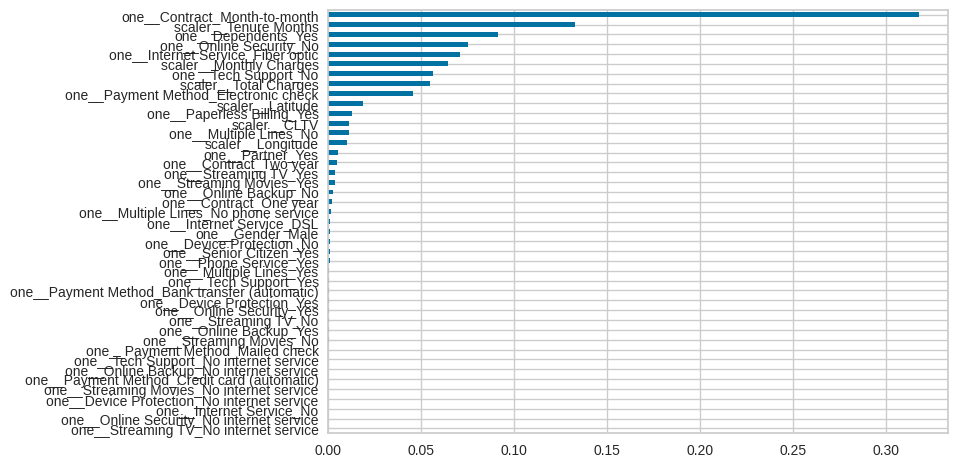

In [81]:
important_features = pd.Series(
    data=pipeline.named_steps['model'].feature_importances_,
    index=pipeline.named_steps['pre_processing'].get_feature_names_out()
)
important_features.sort_values().plot.barh()

In [72]:
important_features.sort_values()

one__Streaming TV_No internet service            0.000000e+00
one__Online Security_No internet service         0.000000e+00
one__Internet Service_No                         0.000000e+00
one__Device Protection_No internet service       0.000000e+00
one__Streaming Movies_No internet service        0.000000e+00
one__Payment Method_Credit card (automatic)      4.730272e-07
one__Online Backup_No internet service           2.449102e-05
one__Tech Support_No internet service            4.031993e-05
one__Payment Method_Mailed check                 6.889313e-05
one__Streaming Movies_No                         1.085697e-04
one__Online Backup_Yes                           1.353623e-04
one__Streaming TV_No                             1.647316e-04
one__Online Security_Yes                         1.647643e-04
one__Device Protection_Yes                       1.678569e-04
one__Payment Method_Bank transfer (automatic)    1.734086e-04
one__Tech Support_Yes                            1.860644e-04
one__Mul

In [73]:
pipeline.named_steps['pre_processing'].get_feature_names_out()

array(['one__Gender_Male', 'one__Senior Citizen_Yes', 'one__Partner_Yes',
       'one__Dependents_Yes', 'one__Phone Service_Yes',
       'one__Multiple Lines_No', 'one__Multiple Lines_No phone service',
       'one__Multiple Lines_Yes', 'one__Internet Service_DSL',
       'one__Internet Service_Fiber optic', 'one__Internet Service_No',
       'one__Online Security_No',
       'one__Online Security_No internet service',
       'one__Online Security_Yes', 'one__Online Backup_No',
       'one__Online Backup_No internet service', 'one__Online Backup_Yes',
       'one__Device Protection_No',
       'one__Device Protection_No internet service',
       'one__Device Protection_Yes', 'one__Tech Support_No',
       'one__Tech Support_No internet service', 'one__Tech Support_Yes',
       'one__Streaming TV_No', 'one__Streaming TV_No internet service',
       'one__Streaming TV_Yes', 'one__Streaming Movies_No',
       'one__Streaming Movies_No internet service',
       'one__Streaming Movies_Yes',

### Modeling:

#### Treinando o modelo:

In [74]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('one',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Se...
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method']),
                                                 ('scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges',
                                                   'CLTV'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=500, random_state=69,
                                            subsample=0.8))])

In [75]:
y_pred = pipeline.predict(X=x_test)

In [76]:
pipeline.score(x_test, y_test)

0.8083048919226393

### Avaliação do Modelo:

In [77]:
telco_customer_churn.get_metrics(
    y_true=y_test,
    y_pred=y_pred
)

{'Accuracy': 0.8083048919226393,
 'Balanced Accuracy': 0.7334478139081719,
 'Recall': 0.567287784679089,
 'Precison': 0.681592039800995,
 'F1': 0.6192090395480225,
 'ROC_AUC': 0.733447813908172}

### Deployment:

In [78]:
path = r'../models/model.pkl' 

with open(path, 'wb') as file:
    pickle.dump(pipeline, file)